In [1]:
#importing everythin I will need

import numpy as np 
import matplotlib.pyplot as plt
from scipy.stats import expon


In [2]:

#setting paramethers 
l = 30
t = 0.2

n = 10000
trials = 100

#store results 
emails = []
probabilities = []


for i in range(trials): 
    #simulate the process of receiving emails
    num_emails = np.random.poisson(l*t)
    emails.append(num_emails)
    p_less5 = sum(np.random.poisson(l*t,size = n)<5)/n
    p_5after12 = 1 - p_less5
    probabilities.append(p_5after12)
mean = np.mean(probabilities)


print('Average probability for the 5th email arriving after 12 min is {}'.format(1-mean))



Average probability for the 5th email arriving after 12 min is 0.28511900000000023


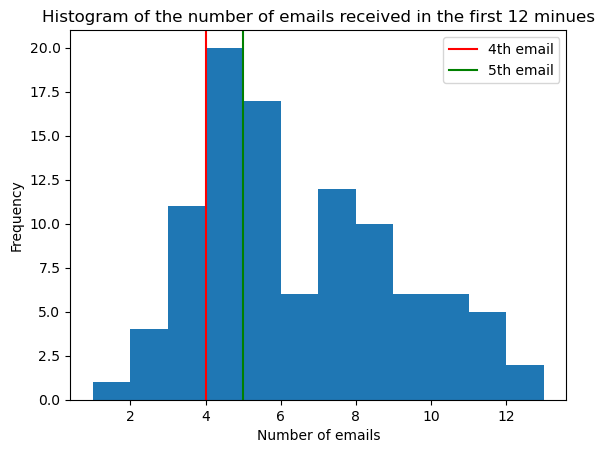

In [3]:
plt.hist(emails,bins = 12)
plt.axvline(x = 4, color = 'r', label = '4th email')
plt.axvline(x = 5, color = 'g', label = '5th email')
plt.legend()
plt.title('Histogram of the number of emails received in the first 12 minues')
plt.xlabel('Number of emails')
plt.ylabel('Frequency')
plt.show()

In [4]:
# PDF 
def pdf(x, l1, l2):
    return l1*np.exp(-l1*x) - (l1+l2)*np.exp(-(l1+l2)*x) + l2*np.exp(-l2*x)
# CDF
def cdf(y, l1, l2):
    return -np.log((l1*np.exp(-l1*y) - l2*np.exp(-l2*y))/((l1+l2)*np.exp(-(l1+l2)*y)))


# Set parameters
l1 = 1
l2 = 2

# Generate random samples from the distribution
n = 10000
u = np.random.uniform(size=n)
x = cdf(u, l1, l2)


# Calculate the values of T1 and T2 for each sample
t1 = np.random.exponential(1/l1, size=n)
t2 = np.random.exponential(1/l2, size=n)


x_max = np.maximum(t1, t2)

mean = np.mean(x_max)
var = np.var(x_max)



print("simulated mean of X: ", mean)
print("calculated mean of X: ", 1/1 + 1/2 - 1/(1+ 2))
print("simulated variance of X: ", var)
print("calculated variance of X: ", 2/l1**2-2/(l1+l2)**2+2/l2**2-(1/l1-1/(l1+l2)+1/l2)**2)



simulated mean of X:  1.1745699378169885
calculated mean of X:  1.1666666666666667
simulated variance of X:  0.9488341458574346
calculated variance of X:  0.9166666666666663


/var/folders/k_/yc0ykmqs4l725qknvzyg0mmc0000gn/T/ipykernel_23471/4032710677.py:6: RuntimeWarning: invalid value encountered in log
  return -np.log((l1*np.exp(-l1*y) - l2*np.exp(-l2*y))/((l1+l2)*np.exp(-(l1+l2)*y)))


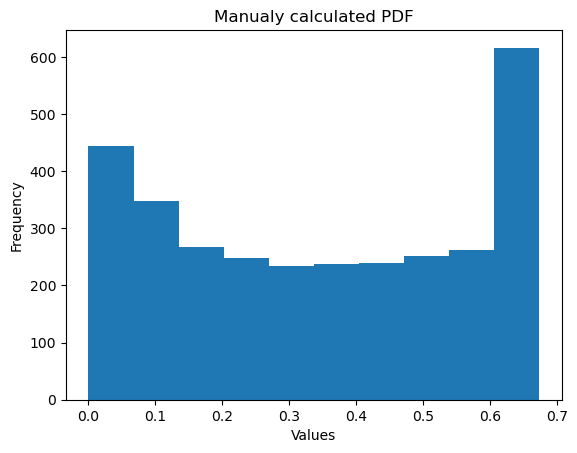

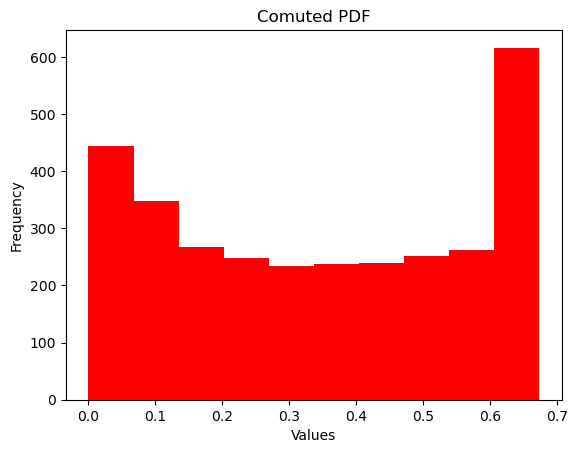

In [5]:
pdf_calc = l1*np.exp(-l1*x) - (l1+ l2)* np.exp(-(l1+l2)* x) +l2* np.exp(-l2 *x)

plt.hist(pdf_calc)
plt.title('Manualy calculated PDF')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.show()
plt.hist(pdf(x, l1, l2),color = 'r')
plt.title('Comuted PDF')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.show()

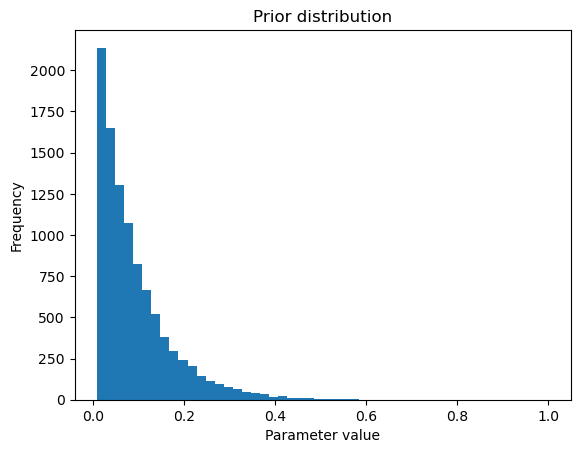

In [6]:
#prior distribution 

#set range
mean = 0.5
low = 0.01
high = 1

n = 10000

# Generate distribution
d = np.random.exponential(scale=mean, size=n)

# Scale and shift the distribution to fit the desired range 
#I used Chat GPT to come up with this shift
scaled_dist = d / np.max(d)
shifted_dist = scaled_dist * (high - low) + low


plt.hist(shifted_dist, bins=50)
plt.xlabel('Parameter value')
plt.ylabel('Frequency')
plt.title('Prior distribution')
plt.show()


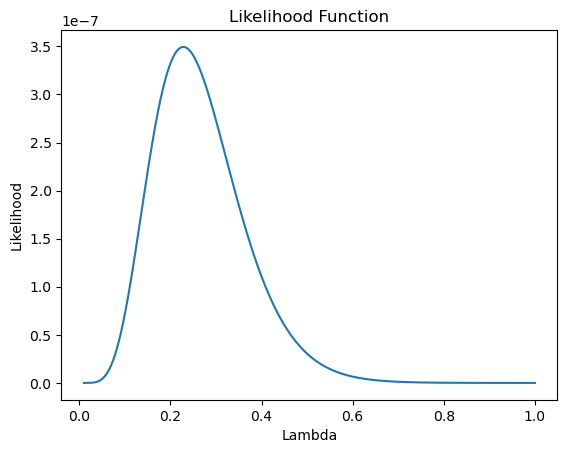

In [7]:
x = np.array([1.3, 2.3, 3.9, 6.1, 6.2, 6.5])
num_observ = len(x)

# Create an array of possible values for lambda
lambdas = np.linspace(0.01, 1, n)


def likelihood_function(lambda_value, x):
    likelihood = lambda_value ** num_observ * np.exp(-lambda_value * np.sum(x))
    return likelihood

likelihoods = []
for i in lambdas:
    likelihoods.append(likelihood_function(i,x))
    

plt.plot(lambdas,likelihoods)
plt.xlabel('Lambda')
plt.ylabel('Likelihood')
plt.title("Likelihood Function")
plt.show()

In [8]:
maxi = max(likelihoods)

for i in range(len(likelihoods)):
    if likelihoods[i] == maxi:
        maximum = lambdas[i]
print(maximum)

0.2281188118811881


In [9]:
# prior parameter based on the previous findings 
alpha = maximum

#code formula is created with help of Chat GPT
marginal_likelihood = (alpha ** num_observ) / ((alpha + np.sum(x)) ** (num_observ + 1))

print(marginal_likelihood)


1.524127952525897e-14


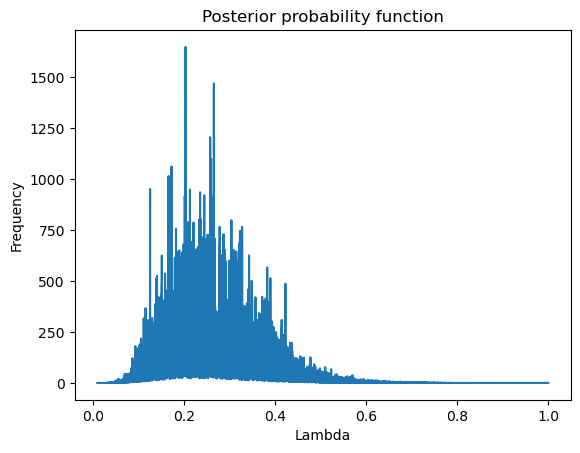

In [10]:
posterior = []


for i in range(n):
    p = shifted_dist[i]*likelihoods[i]/marginal_likelihood
    posterior.append(p/n)
    
    
    
plt.plot(lambdas,posterior)
plt.xlabel('Lambda')
plt.ylabel('Frequency')
plt.title("Posterior probability function")
plt.show()



In [11]:
def max_lambda(posterior,lambdas):
    for i in range(len(posterior)):
        if posterior[i] == max(posterior):
            return lambdas[i]
        
max_lambda(posterior,lambdas)    

0.20376237623762375

In [12]:
credible_interval = np.percentile(lambdas, [0.5, 99.5])
print("99% credible interval is {}".format(credible_interval))

99% credible interval is [0.01495 0.99505]


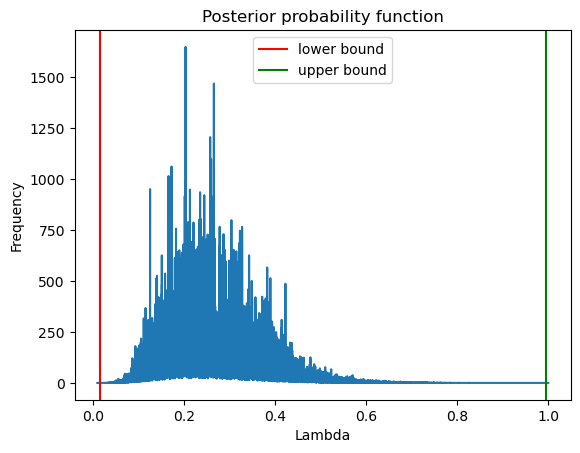

In [13]:
plt.plot(lambdas,posterior)
plt.xlabel('Lambda')
plt.ylabel('Frequency')
plt.title("Posterior probability function")
plt.axvline(x = credible_interval[0], color = 'r',label = 'lower bound')
plt.axvline(x = credible_interval[1], color = 'g',label = 'upper bound')
plt.legend()
plt.show()